# **Mount Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# **Imports and Configs**

In [2]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tensorflow.keras import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from keras.applications.vgg16 import preprocess_input
from keras.utils.np_utils import to_categorical
import numpy as np
import datetime

train_data_dir = "/content/drive/My Drive/CAD Project/dataset1/train"
validation_data_dir = "/content/drive/My Drive/CAD Project/dataset1/val"

large_train_data_dir = "/content/drive/My Drive/CAD Project/dataset1/large/train"
large_validation_data_dir = "/content/drive/My Drive/CAD Project/dataset1/large/val"

img_width, img_height = 224, 224
n_classes = 2
batch_size = 16
epochs = 100

Using TensorFlow backend.


# **Prepare Data**

In [3]:
# Train without data augumentation 
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
  train_data_dir,
  target_size = (img_height, img_width),
  batch_size = batch_size, 
  class_mode = "categorical"
)

# Train with data Augumentation 1
train_generator_augment1 = ImageDataGenerator(
  preprocessing_function=preprocess_input,
  horizontal_flip = True,
  fill_mode = "nearest",
  zoom_range = 0.2,
  width_shift_range = 0.1,
  height_shift_range=0.1,
  rotation_range=180
).flow_from_directory(
  train_data_dir,
  target_size = (img_height, img_width),
  batch_size = batch_size, 
  class_mode = "categorical"
)

# Initiate the train with data Augumentation
train_generator_augment2 = ImageDataGenerator(
  preprocessing_function=preprocess_input,
  horizontal_flip = True,
  vertical_flip = True,
  zoom_range = 0.1,
  shear_range=0.2,
  width_shift_range = 0.2,
  height_shift_range=0.2,
  rotation_range=270
).flow_from_directory(
  train_data_dir,
  target_size = (img_height, img_width),
  batch_size = batch_size, 
  class_mode = "categorical"
)

# Validation
validation_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
  validation_data_dir,
  target_size = (img_height, img_width),
  batch_size=batch_size,
  class_mode = "categorical"
)

# ***********************************************************************

# Large Train without data augumentation 
large_train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
  large_train_data_dir,
  target_size = (img_height, img_width),
  batch_size = batch_size, 
  class_mode = "categorical"
)

# Large Train with data Augumentation 1
large_train_generator_augment1 = ImageDataGenerator(
  preprocessing_function=preprocess_input,
  horizontal_flip = True,
  fill_mode = "nearest",
  zoom_range = 0.2,
  width_shift_range = 0.1,
  height_shift_range=0.1,
  rotation_range=180
).flow_from_directory(
  large_train_data_dir,
  target_size = (img_height, img_width),
  batch_size = batch_size, 
  class_mode = "categorical"
)

# Large Validation
large_validation_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
  large_validation_data_dir,
  target_size = (img_height, img_width),
  batch_size=batch_size,
  class_mode = "categorical"
)

# ***********************************************************************

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples 

nb_large_train_samples = large_train_generator.samples
nb_large_validation_samples = large_validation_generator.samples 

Found 0 images belonging to 2 classes.
Found 4800 images belonging to 2 classes.
Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 5964 images belonging to 2 classes.
Found 5964 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


# **Load Model**

In [0]:
from keras.models import load_model

model_fullpath = "/content/drive/My Drive/vgg16_binary_exp1_train6.h5"
model_final = load_model(model_fullpath)

In [0]:
a = model_final.layers[-1]



# **Build Model**

## **Without Top Layers**

In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tensorflow.keras import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
import numpy as np
import datetime

from keras.applications.vgg16 import preprocess_input

img_width, img_height = 150, 150
train_data_dir = "/content/drive/My Drive/CAD Project/dataset1/train"
validation_data_dir = "/content/drive/My Drive/CAD Project/dataset1/val"
n_classes = 2
batch_size = 32
epochs = 100
modelName = 'vgg16_2class_' + str(datetime.datetime.now().microsecond)


model = applications.VGG16(weights = "imagenet", include_top=False, 
                           input_shape = (img_width, img_height, 3))


# Freeze the layers which you don't want to train. 
for layer in model.layers:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)

x = Dense(1024, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(1024, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(n_classes, activation='softmax')(x)

# creating the final model 
model_final = Model(inputs = model.input, outputs = predictions)

# compile the model 
model_final.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

# Initiate the train without data Augumentation 
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
  train_data_dir,
  target_size = (img_height, img_width),
  batch_size = batch_size, 
  class_mode = "categorical"
)

# Initiate the train with data Augumentation
train_datagen_augment = ImageDataGenerator(
  preprocessing_function=preprocess_input,
  horizontal_flip = True,
  fill_mode = "nearest",
  zoom_range = 0.2,
  width_shift_range = 0.1,
  height_shift_range=0.1,
  rotation_range=180
)

train_generator_augment = train_datagen_augment.flow_from_directory(
  train_data_dir,
  target_size = (img_height, img_width),
  batch_size = batch_size, 
  class_mode = "categorical"
)

validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
  validation_data_dir,
  target_size = (img_height, img_width),
  batch_size=batch_size,
  class_mode = "categorical"
)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples 

Found 4800 images belonging to 2 classes.
Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


## **With Top Layers**

In [0]:
# Load the full VGG16 model with "imagenet" weights
model = applications.VGG16(weights = "imagenet", include_top=True, 
                           input_shape = (img_width, img_height, 3))

# Remove prediction layer
model.layers.pop()

# Freeze all layers (non-trainable)
for layer in model.layers:
    layer.trainable = False

# Add prediction Layer
x = model.layers[-1].output
predictions = Dense(n_classes, activation='softmax')(x)

# Final model
model_final = Model(inputs = model.input, outputs = predictions)

# Final model architecture
# model_final.summary()

# **Train**

In [0]:
# compile the model 
model_final.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

history = model_final.fit_generator(
      train_generator,
      steps_per_epoch=nb_train_samples/batch_size, 
      epochs=50,
      validation_data=validation_generator,
      validation_steps=nb_validation_samples/batch_size,
      verbose=2
)

In [0]:
history = model_final.fit_generator(
      train_generator_augment,
      steps_per_epoch=nb_train_samples/batch_size, 
      epochs=50,
      validation_data=validation_generator,
      validation_steps=nb_validation_samples/batch_size,
      verbose=2
)

# **Fine Tune**

## **Train 1**

In [0]:
for layer in model_final.layers[-3:]:
    layer.trainable = True

model_final.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=0.0001),
              optimizer=optimizers.SGD(lr=0.00001, momentum=0.9),
#                optimizer=optimizers.Adam(lr=0.0001),
              metrics=['acc'])


history = model_final.fit_generator(
      train_generator_augment,
      steps_per_epoch=nb_train_samples/batch_size, 
      epochs=100,
      validation_data=validation_generator,
      validation_steps=nb_validation_samples/batch_size,
      verbose=2
)

Epoch 1/100
 - 1640s - loss: 0.5523 - acc: 0.7265 - val_loss: 0.4927 - val_acc: 0.7650
Epoch 2/100
 - 145s - loss: 0.4433 - acc: 0.7877 - val_loss: 0.4552 - val_acc: 0.7933
Epoch 3/100
 - 146s - loss: 0.4239 - acc: 0.8065 - val_loss: 0.4298 - val_acc: 0.8033
Epoch 4/100
 - 147s - loss: 0.4059 - acc: 0.8175 - val_loss: 0.4141 - val_acc: 0.8150
Epoch 5/100
 - 146s - loss: 0.4032 - acc: 0.8181 - val_loss: 0.4003 - val_acc: 0.8217
Epoch 6/100
 - 146s - loss: 0.3815 - acc: 0.8294 - val_loss: 0.4032 - val_acc: 0.8208
Epoch 7/100
 - 146s - loss: 0.3759 - acc: 0.8319 - val_loss: 0.4004 - val_acc: 0.8225
Epoch 8/100
 - 146s - loss: 0.3749 - acc: 0.8331 - val_loss: 0.3931 - val_acc: 0.8283
Epoch 9/100
 - 146s - loss: 0.3663 - acc: 0.8344 - val_loss: 0.3812 - val_acc: 0.8250
Epoch 10/100
 - 146s - loss: 0.3701 - acc: 0.8348 - val_loss: 0.3757 - val_acc: 0.8358
Epoch 11/100
 - 146s - loss: 0.3582 - acc: 0.8352 - val_loss: 0.3747 - val_acc: 0.8400
Epoch 12/100
 - 147s - loss: 0.3509 - acc: 0.8462 -

## **Train 2**

In [0]:
# Options
trainGen = train_generator_augment1
validationGen = validation_generator
totalEpochs = 100

# Adjust the model
for layer in model_final.layers[-3:]:
    layer.trainable = True
    
model_final.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=0.0001),
              optimizer=optimizers.SGD(lr=0.00001, momentum=0.9),
#                optimizer=optimizers.Adam(lr=0.0001),
              metrics=['acc'])


totalTrainSamples = trainGen.samples
totalValidationSamples = validationGen.samples
trainGen.reset()
validationGen.reset()

# Train
history = model_final.fit_generator(
      trainGen,
      steps_per_epoch=totalTrainSamples/batch_size, 
      epochs=totalEpochs,
      validation_data=validationGen,
      validation_steps=totalValidationSamples/batch_size,
      verbose=2
)

## **Train 3**

In [0]:
# Options
trainGen = train_generator
validationGen = validation_generator
totalEpochs = 20

# Adjust the model
for layer in model_final.layers[-3:]:
    layer.trainable = True

# model_final.compile(loss='categorical_crossentropy',
# #               optimizer=optimizers.RMSprop(lr=0.0001),
#               optimizer=optimizers.SGD(lr=0.00001, momentum=0.9),
# #                optimizer=optimizers.Adam(lr=0.0001),
#               metrics=['acc'])


totalTrainSamples = trainGen.samples
totalValidationSamples = validationGen.samples
trainGen.reset()
validationGen.reset()

# Train
history = model_final.fit_generator(
      trainGen,
      steps_per_epoch=totalTrainSamples/batch_size, 
      epochs=totalEpochs,
      validation_data=validationGen,
      validation_steps=totalValidationSamples/batch_size,
      verbose=2
)

Epoch 1/20
 - 1725s - loss: 0.1635 - acc: 0.9369 - val_loss: 0.3064 - val_acc: 0.8825
Epoch 2/20
 - 98s - loss: 0.1400 - acc: 0.9513 - val_loss: 0.3111 - val_acc: 0.8733
Epoch 3/20
 - 98s - loss: 0.1241 - acc: 0.9615 - val_loss: 0.3120 - val_acc: 0.8833
Epoch 4/20
 - 98s - loss: 0.1091 - acc: 0.9725 - val_loss: 0.3111 - val_acc: 0.8842
Epoch 5/20
 - 98s - loss: 0.0994 - acc: 0.9779 - val_loss: 0.3055 - val_acc: 0.8867
Epoch 6/20
 - 98s - loss: 0.0896 - acc: 0.9802 - val_loss: 0.3051 - val_acc: 0.8850
Epoch 7/20
 - 98s - loss: 0.0833 - acc: 0.9833 - val_loss: 0.3042 - val_acc: 0.8867
Epoch 8/20
 - 98s - loss: 0.0769 - acc: 0.9871 - val_loss: 0.3112 - val_acc: 0.8817
Epoch 9/20
 - 98s - loss: 0.0707 - acc: 0.9896 - val_loss: 0.3047 - val_acc: 0.8892
Epoch 10/20
 - 98s - loss: 0.0656 - acc: 0.9910 - val_loss: 0.3057 - val_acc: 0.8933
Epoch 11/20
 - 98s - loss: 0.0617 - acc: 0.9935 - val_loss: 0.3062 - val_acc: 0.8892
Epoch 12/20
 - 97s - loss: 0.0573 - acc: 0.9942 - val_loss: 0.3060 - val

## **Train 4**

In [0]:
# Options
trainGen = train_generator_augment2
validationGen = validation_generator
totalEpochs = 100

# Adjust the model
for layer in model_final.layers[-3:]:
    layer.trainable = True

# model_final.compile(loss='categorical_crossentropy',
# #               optimizer=optimizers.RMSprop(lr=0.0001),
#               optimizer=optimizers.SGD(lr=0.00001, momentum=0.9),
# #                optimizer=optimizers.Adam(lr=0.0001),
#               metrics=['acc'])


totalTrainSamples = trainGen.samples
totalValidationSamples = validationGen.samples
trainGen.reset()
validationGen.reset()

# Train
history = model_final.fit_generator(
      trainGen,
      steps_per_epoch=totalTrainSamples/batch_size, 
      epochs=totalEpochs,
      validation_data=validationGen,
      validation_steps=totalValidationSamples/batch_size,
      verbose=2
)

Epoch 1/100
 - 132s - loss: 0.1409 - acc: 0.9502 - val_loss: 0.3158 - val_acc: 0.8850
Epoch 2/100
 - 127s - loss: 0.1431 - acc: 0.9458 - val_loss: 0.3112 - val_acc: 0.8808
Epoch 3/100
 - 126s - loss: 0.1418 - acc: 0.9431 - val_loss: 0.3065 - val_acc: 0.8850
Epoch 4/100
 - 124s - loss: 0.1329 - acc: 0.9485 - val_loss: 0.3140 - val_acc: 0.8842
Epoch 5/100
 - 126s - loss: 0.1377 - acc: 0.9506 - val_loss: 0.3117 - val_acc: 0.8842
Epoch 6/100
 - 123s - loss: 0.1429 - acc: 0.9483 - val_loss: 0.3164 - val_acc: 0.8800
Epoch 7/100
 - 124s - loss: 0.1391 - acc: 0.9479 - val_loss: 0.3107 - val_acc: 0.8817
Epoch 8/100
 - 125s - loss: 0.1363 - acc: 0.9498 - val_loss: 0.3173 - val_acc: 0.8758
Epoch 9/100
 - 124s - loss: 0.1379 - acc: 0.9483 - val_loss: 0.3218 - val_acc: 0.8758
Epoch 10/100
 - 124s - loss: 0.1357 - acc: 0.9479 - val_loss: 0.3147 - val_acc: 0.8817
Epoch 11/100
 - 122s - loss: 0.1359 - acc: 0.9481 - val_loss: 0.3258 - val_acc: 0.8758
Epoch 12/100
 - 122s - loss: 0.1359 - acc: 0.9498 - 

## **Train 5**

In [0]:
# Options
trainGen = train_generator
validationGen = validation_generator
totalEpochs = 50

# Adjust the model
for layer in model_final.layers[-3:]:
    layer.trainable = True

# model_final.compile(loss='categorical_crossentropy',
# #               optimizer=optimizers.RMSprop(lr=0.0001),
#               optimizer=optimizers.SGD(lr=0.00001, momentum=0.9),
# #                optimizer=optimizers.Adam(lr=0.0001, decay=0.15),
#               metrics=['acc'])


totalTrainSamples = trainGen.samples
totalValidationSamples = validationGen.samples
trainGen.reset()
validationGen.reset()

# Train
history = model_final.fit_generator(
      trainGen,
      steps_per_epoch=totalTrainSamples/batch_size, 
      epochs=totalEpochs,
      validation_data=validationGen,
      validation_steps=totalValidationSamples/batch_size,
      verbose=2
)

Epoch 1/50
 - 1693s - loss: 0.0496 - acc: 0.9915 - val_loss: 0.3270 - val_acc: 0.8800
Epoch 2/50
 - 99s - loss: 0.0398 - acc: 0.9967 - val_loss: 0.3254 - val_acc: 0.8825
Epoch 3/50
 - 99s - loss: 0.0346 - acc: 0.9973 - val_loss: 0.3249 - val_acc: 0.8825
Epoch 4/50
 - 99s - loss: 0.0306 - acc: 0.9979 - val_loss: 0.3360 - val_acc: 0.8833
Epoch 5/50
 - 99s - loss: 0.0277 - acc: 0.9983 - val_loss: 0.3308 - val_acc: 0.8817
Epoch 6/50
 - 99s - loss: 0.0250 - acc: 0.9994 - val_loss: 0.3293 - val_acc: 0.8867
Epoch 7/50
 - 99s - loss: 0.0235 - acc: 0.9992 - val_loss: 0.3308 - val_acc: 0.8892
Epoch 8/50
 - 98s - loss: 0.0216 - acc: 0.9992 - val_loss: 0.3321 - val_acc: 0.8867
Epoch 9/50
 - 98s - loss: 0.0202 - acc: 0.9998 - val_loss: 0.3348 - val_acc: 0.8850
Epoch 10/50
 - 99s - loss: 0.0189 - acc: 0.9996 - val_loss: 0.3358 - val_acc: 0.8850
Epoch 11/50
 - 99s - loss: 0.0180 - acc: 1.0000 - val_loss: 0.3459 - val_acc: 0.8883
Epoch 12/50
 - 99s - loss: 0.0169 - acc: 0.9998 - val_loss: 0.3403 - val

## **Train 6**

In [0]:
# Options
trainGen = train_generator_augment1
validationGen = validation_generator
totalEpochs = 100

# Adjust the model
for layer in model_final.layers[-3:]:
    layer.trainable = True
    
# it should be using adams 0.0001

# model_final.compile(loss='categorical_crossentropy',
# #               optimizer=optimizers.RMSprop(lr=0.0001),
#                optimizer=optimizers.SGD(lr=0.00001, momentum=0.9),
# #               optimizer=optimizers.Adam(lr=0.0001, decay=0.15),
#               metrics=['acc'])


totalTrainSamples = trainGen.samples
totalValidationSamples = validationGen.samples
trainGen.reset()
validationGen.reset()

# Train
history = model_final.fit_generator(
      trainGen,
      steps_per_epoch=totalTrainSamples/batch_size, 
      epochs=totalEpochs,
      validation_data=validationGen,
      validation_steps=totalValidationSamples/batch_size,
      verbose=2
)

Epoch 1/100
 - 152s - loss: 0.1098 - acc: 0.9579 - val_loss: 0.3530 - val_acc: 0.8883
Epoch 2/100
 - 149s - loss: 0.1031 - acc: 0.9594 - val_loss: 0.3389 - val_acc: 0.8833
Epoch 3/100
 - 149s - loss: 0.1115 - acc: 0.9560 - val_loss: 0.3345 - val_acc: 0.8950
Epoch 4/100
 - 149s - loss: 0.1081 - acc: 0.9604 - val_loss: 0.3379 - val_acc: 0.8833
Epoch 5/100
 - 149s - loss: 0.1051 - acc: 0.9581 - val_loss: 0.3509 - val_acc: 0.8875
Epoch 6/100
 - 148s - loss: 0.1017 - acc: 0.9627 - val_loss: 0.3382 - val_acc: 0.8883
Epoch 7/100
 - 149s - loss: 0.0966 - acc: 0.9646 - val_loss: 0.3299 - val_acc: 0.8900
Epoch 8/100
 - 149s - loss: 0.0968 - acc: 0.9652 - val_loss: 0.3388 - val_acc: 0.8917
Epoch 9/100
 - 149s - loss: 0.0975 - acc: 0.9627 - val_loss: 0.3471 - val_acc: 0.8858
Epoch 10/100
 - 150s - loss: 0.0961 - acc: 0.9635 - val_loss: 0.3297 - val_acc: 0.8942
Epoch 11/100
 - 149s - loss: 0.0907 - acc: 0.9679 - val_loss: 0.3336 - val_acc: 0.8850
Epoch 12/100
 - 149s - loss: 0.0925 - acc: 0.9665 - 

## **Train 7**

In [0]:
# Options
trainGen = train_generator_augment2
validationGen = validation_generator
totalEpochs = 100

# Adjust the model
for layer in model_final.layers[-3:]:
    layer.trainable = True
    
# it should be using adams 0.0001

# model_final.compile(loss='categorical_crossentropy',
# #               optimizer=optimizers.RMSprop(lr=0.0001),
#                optimizer=optimizers.SGD(lr=0.00001, momentum=0.9),
# #               optimizer=optimizers.Adam(lr=0.0001, decay=0.15),
#               metrics=['acc'])


totalTrainSamples = trainGen.samples
totalValidationSamples = validationGen.samples
trainGen.reset()
validationGen.reset()

# Train
history = model_final.fit_generator(
      trainGen,
      steps_per_epoch=totalTrainSamples/batch_size, 
      epochs=totalEpochs,
      validation_data=validationGen,
      validation_steps=totalValidationSamples/batch_size,
      verbose=2
)

Epoch 1/100
 - 152s - loss: 0.1013 - acc: 0.9613 - val_loss: 0.3246 - val_acc: 0.8942
Epoch 2/100
 - 148s - loss: 0.1025 - acc: 0.9602 - val_loss: 0.3297 - val_acc: 0.8917
Epoch 3/100
 - 149s - loss: 0.1060 - acc: 0.9621 - val_loss: 0.3325 - val_acc: 0.8942
Epoch 4/100
 - 149s - loss: 0.0998 - acc: 0.9604 - val_loss: 0.3343 - val_acc: 0.8858
Epoch 5/100
 - 149s - loss: 0.0986 - acc: 0.9621 - val_loss: 0.3341 - val_acc: 0.8900
Epoch 6/100
 - 149s - loss: 0.1008 - acc: 0.9637 - val_loss: 0.3494 - val_acc: 0.8875
Epoch 7/100
 - 149s - loss: 0.0996 - acc: 0.9625 - val_loss: 0.3419 - val_acc: 0.8892
Epoch 8/100
 - 149s - loss: 0.1031 - acc: 0.9631 - val_loss: 0.3364 - val_acc: 0.8867
Epoch 9/100
 - 148s - loss: 0.0999 - acc: 0.9621 - val_loss: 0.3328 - val_acc: 0.8917
Epoch 10/100
 - 149s - loss: 0.0986 - acc: 0.9623 - val_loss: 0.3390 - val_acc: 0.8858
Epoch 11/100
 - 149s - loss: 0.1006 - acc: 0.9633 - val_loss: 0.3401 - val_acc: 0.8850
Epoch 12/100
 - 149s - loss: 0.0995 - acc: 0.9642 - 

KeyboardInterrupt: ignored

# ** Train with Large Dataset (Train Set + Validation Set )**

## **Train 1**

In [0]:
# Options
trainGen = large_train_generator_augment1
validationGen = large_validation_generator
totalEpochs = 150

# Adjust the model
for layer in model_final.layers[-3:]:
    layer.trainable = True

model_final.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=0.0001),
            optimizer=optimizers.SGD(lr=0.000001, momentum=0.9),
#                optimizer=optimizers.Adam(lr=0.00001, decay=0.2),
              metrics=['acc'])

totalTrainSamples = trainGen.samples
totalValidationSamples = validationGen.samples
trainGen.reset()
validationGen.reset()

# Train
history = model_final.fit_generator(
      trainGen,
      steps_per_epoch=totalTrainSamples/batch_size, 
      epochs=totalEpochs,
      validation_data=validationGen,
      validation_steps=totalValidationSamples/batch_size,
      verbose=2
)

Epoch 1/150
 - 173s - loss: 0.0966 - acc: 0.9638 - val_loss: 0.8460 - val_acc: 0.8250
Epoch 2/150
 - 168s - loss: 0.0937 - acc: 0.9641 - val_loss: 0.8393 - val_acc: 0.8250
Epoch 3/150
 - 169s - loss: 0.0927 - acc: 0.9668 - val_loss: 0.8448 - val_acc: 0.8250
Epoch 4/150
 - 169s - loss: 0.0978 - acc: 0.9648 - val_loss: 0.8691 - val_acc: 0.8000
Epoch 5/150
 - 169s - loss: 0.0942 - acc: 0.9648 - val_loss: 0.8377 - val_acc: 0.8250
Epoch 6/150
 - 169s - loss: 0.0917 - acc: 0.9697 - val_loss: 0.8511 - val_acc: 0.8250
Epoch 7/150
 - 169s - loss: 0.0929 - acc: 0.9658 - val_loss: 0.8360 - val_acc: 0.8250
Epoch 8/150
 - 169s - loss: 0.0893 - acc: 0.9660 - val_loss: 0.8316 - val_acc: 0.8250
Epoch 9/150
 - 169s - loss: 0.0936 - acc: 0.9678 - val_loss: 0.8307 - val_acc: 0.8250
Epoch 10/150
 - 169s - loss: 0.0925 - acc: 0.9672 - val_loss: 0.8290 - val_acc: 0.8250
Epoch 11/150
 - 169s - loss: 0.0878 - acc: 0.9678 - val_loss: 0.8120 - val_acc: 0.8250
Epoch 12/150
 - 170s - loss: 0.0963 - acc: 0.9667 - 

## **Train 2**

In [0]:
# Options
trainGen = large_train_generator
validationGen = large_validation_generator
totalEpochs = 20

# Adjust the model
for layer in model_final.layers[-3:]:
    layer.trainable = True

model_final.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=0.0001),
            optimizer=optimizers.SGD(lr=0.000005, momentum=0.9),
#                optimizer=optimizers.Adam(lr=0.00001, decay=0.2),
              metrics=['acc'])


totalTrainSamples = trainGen.samples
totalValidationSamples = validationGen.samples
trainGen.reset()
validationGen.reset()

# Train
history = model_final.fit_generator(
      trainGen,
      steps_per_epoch=totalTrainSamples/batch_size, 
      epochs=totalEpochs,
      validation_data=validationGen,
      validation_steps=totalValidationSamples/batch_size,
      verbose=2
)

NameError: ignored

# **History**

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training (blue) and validation (green) accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training (blue) and validation (green) loss')

NameError: ignored

# **Predict**

## **Normal Set**

In [5]:
# Directory of test data
testDirectory = validation_data_dir

# Test data
test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
  testDirectory,
  target_size = (img_height, img_width),
  class_mode = "categorical",
  batch_size = batch_size,
  shuffle=False
)

print(test_generator.class_indices.items())

# Test ground truth
test_labels = np.array([0] * 600 + [1] * 600)

# Predict
probabilities = model_final.predict_generator(
    test_generator,
    steps=test_generator.samples/batch_size
)

# predicted labels and true labels in raveled format
y_pred_ravel = np.argmax(probabilities, axis=-1)
y_true_ravel = np.ravel(test_labels)

# predicted labels and true labels in categorical format
y_pred_cat = to_categorical(y_pred_ravel, num_classes=n_classes)
y_true_cat = to_categorical(y_true_ravel, num_classes=n_classes)

# from keras import backend
# y_true_cat =  backend.one_hot(y_true_cat, 3)
# y_pred_cat = backend.one_hot(probabilities, 3)

# label_map = (train_generator.class_indices)
# label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
# predictions = [label_map[k] for k in predictions]

Found 1200 images belonging to 2 classes.
dict_items([('les', 0), ('nv', 1)])


## **Large Set**

In [0]:
# Directory of test data
testDirectory = large_validation_data_dir

# Test data
test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
  testDirectory,
  target_size = (img_height, img_width),
  class_mode = "categorical",
  batch_size = batch_size,
  shuffle=False
)

print(test_generator.class_indices.items())

# Test ground truth
test_labels = np.array([0] * 20 + [1] * 20)

# Predict
probabilities = model_final.predict_generator(
    test_generator,
    steps=test_generator.samples/batch_size
)

# predicted labels and true labels in raveled format
y_pred_ravel = np.argmax(probabilities, axis=-1)
y_true_ravel = np.ravel(test_labels)

# predicted labels and true labels in categorical format
y_pred_cat = to_categorical(y_pred_ravel, num_classes=n_classes)
y_true_cat = to_categorical(y_true_ravel, num_classes=n_classes)

# from keras import backend
# y_true_cat =  backend.one_hot(y_true_cat, 3)
# y_pred_cat = backend.one_hot(probabilities, 3)

# label_map = (train_generator.class_indices)
# label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
# predictions = [label_map[k] for k in predictions]

Found 40 images belonging to 2 classes.
dict_items([('les', 0), ('nv', 1)])


# **Accuracy**

In [6]:
res = y_true_ravel == y_pred_ravel

print(np.sum(res)/len(res))

0.9008333333333334


# **Confusion Matrix**

Confusion matrix, without normalization
[[532  68]
 [ 51 549]]
Normalized confusion matrix
[[0.89 0.11]
 [0.09 0.92]]


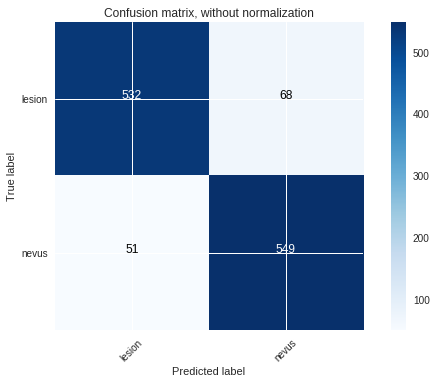

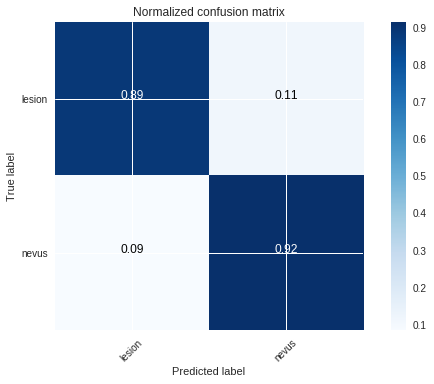

In [8]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ['lesion', 'nevus']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true_ravel, y_pred_ravel)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# **Metrics**

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_true_ravel, y_pred_ravel))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       600
           1       0.89      0.92      0.90       600

   micro avg       0.90      0.90      0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



# **AUC**

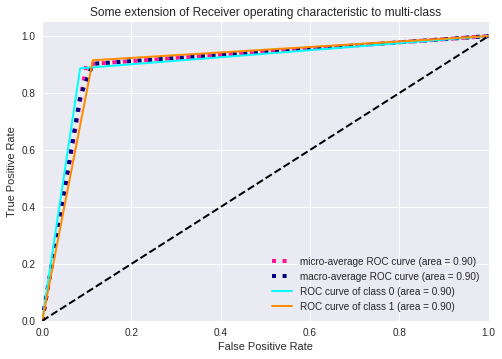

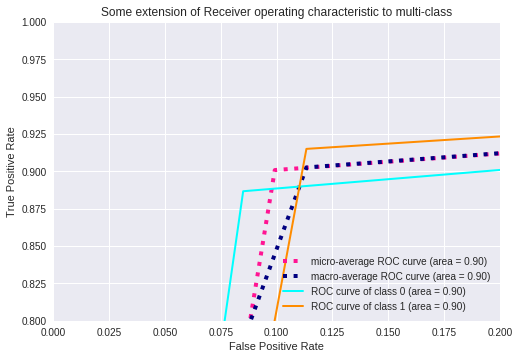

In [0]:
# https://hackernoon.com/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

n_classes = 2

# Plot linewidth.
lw = 2

# y_true = to_categorical(np.array([1,1,0,2]), num_classes=3)
# y_pred = to_categorical(np.array([0,1,0,2]), num_classes=3)

y_test = y_true_cat
y_score = y_pred_cat

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# **Save Model**

In [0]:
modelName = 'vgg16_binary_' + str(datetime.datetime.now().microsecond) + '.h5'

# modelName = 'vgg16_binary_exp2_mix.h5'

model_final.save(modelName)

# from google.colab import file
# files.download(modelName) 

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Save Keras Model or weights on google drive

# create on Colab directory   
model_file = drive.CreateFile({'title' : modelName})
model_file.SetContentFile(modelName)
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1Hf5tkcs2Y2GiPH4qseZTs14tzWtUFlK1'})

# **Predict Test Set**

In [0]:
# Directory of test data
testDirectory = "/content/drive/My Drive/CAD Project/dataset1/testset_old"

batch_size  = 16

# Test data
test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
  testDirectory,
  target_size = (img_height, img_width),
  class_mode = None,
  batch_size = batch_size,
  shuffle=False
)

# Predict
probabilities = model_final.predict_generator(
    test_generator,
    steps=test_generator.samples/batch_size
)

# predicted labels and true labels in raveled format
y_pred_ravel = np.argmax(probabilities, axis=-1)
y_true_ravel = np.ravel(test_labels)

# predicted labels and true labels in categorical format
y_pred_cat = to_categorical(y_pred_ravel, num_classes=n_classes)
y_true_cat = to_categorical(y_true_ravel, num_classes=n_classes)

# from keras import backend
# y_true_cat =  backend.one_hot(y_true_cat, 3)
# y_pred_cat = backend.one_hot(probabilities, 3)

# label_map = (train_generator.class_indices)
# label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
# predictions = [label_map[k] for k in predictions]

Found 1021 images belonging to 1 classes.


In [0]:
test_generator.reset()
im = test_generator.next()

im =im[0,:,:,:]
im.shape

im = im.astype(ushort)

import matplotlib.pyplot as plt
imgplot = plt.imshow(im)
plt.show()

# import os
# f = os.listdir( "/content/drive/My Drive/CAD Project/dataset1/testset/test")
# f.sort()


# img.shape

AttributeError: ignored